# Pubg Game Prediction

## Importing Modules

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(njobs = -1)
%matplotlib inline


In [59]:
file1 = pd.read_csv('./PUBG_Game_Prediction_data.csv')

<center>

| **No.** | **Column Name**      | **Description**                                           |
| :-----: | :------------------: | :--------------------------------------------------------: |
|    1    | **Id**               | Unique identifier for each player's match data             |
|    2    | **groupId**          | Identifier for the group the player was in                 |
|    3    | **matchId**          | Unique identifier for the match                            |
|    4    | **assists**          | Number of assists the player had in the match              |
|    5    | **boosts**           | Number of boosts used by the player in the match           |
|    6    | **damageDealt**      | Total damage dealt by the player in the match              |
|    7    | **DBNOs**            | Number of Down But Not Out (DBNO) events the player had    |
|    8    | **headshotKills**    | Number of headshot kills the player had in the match       |
|    9    | **heals**            | Number of heals the player used in the match               |
|   10    | **killPlace**        | The player's ranking in terms of kills in the match        |
|   11    | **killPoints**       | Total kill points earned by the player in the match        |
|   12    | **kills**            | Number of kills the player had in the match                |
|   13    | **killStreaks**      | Number of kill streaks the player had in the match         |
|   14    | **longestKill**      | Distance of the player's longest kill in the match         |
|   15    | **matchDuration**    | Length of the match in seconds                             |
|   16    | **matchType**        | Type of match (e.g. solo, duo, squad)                      |
|   17    | **maxPlace**         | The highest ranking the player achieved in the match       |
|   18    | **numGroups**        | Number of groups in the match                              |
|   19    | **rankPoints**       | Total rank points earned by the player in the match        |
|   20    | **revives**          | Number of revives the player used in the match             |
|   21    | **rideDistance**     | Distance the player traveled by vehicle in the match       |
|   22    | **roadKills**        | Number of road kills the player had in the match           |
|   23    | **swimDistance**     | Distance the player swam in the match                      |
|   24    | **teamKills**        | Number of team kills the player had in the match           |
|   25    | **vehicleDestroys**  | Number of vehicles destroyed by the player in the match    |
|   26    | **walkDistance**     | Distance the player walked in the match                    |
|   27    | **weaponsAcquired**  | Number of weapons acquired by the player in the match      |
|   28    | **winPoints**        | Total win points earned by the player in the match          |
|   29    | **winPlacePerc**     | Percentage of players the player outlasted in the match    |
|   30    | **PlayersJoined**    | Number of players who joined the match                     |

</center>


In [60]:
file1

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [61]:
max_values = file1.max()
print(max_values)

Id                 fffffddae4e502
groupId            fffff98178ef52
matchId            fffe92232706aa
assists                        22
boosts                         33
damageDealt                6616.0
DBNOs                          53
headshotKills                  64
heals                          80
killPlace                     101
killPoints                   2170
kills                          72
killStreaks                    20
longestKill                1094.0
matchDuration                2237
matchType               squad-fpp
maxPlace                      100
numGroups                     100
rankPoints                   5910
revives                        39
rideDistance              40710.0
roadKills                      18
swimDistance               3823.0
teamKills                      12
vehicleDestroys                 5
walkDistance              25780.0
weaponsAcquired               236
winPoints                    2013
winPlacePerc                  1.0
dtype: object


In [62]:
file1.dtypes

Id                  object
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

In [63]:
file1 = file1.astype({
	'assists': 'int32', 'boosts': 'int32', 'damageDealt': 'float32', 'DBNOs': 'int32', 'headshotKills': 'int32',
	'heals': 'int32', 'killPlace': 'int32', 'killPoints': 'int32', 'kills': 'int32', 'killStreaks': 'int32',
	'longestKill': 'float32', 'matchDuration': 'int32', 'maxPlace': 'int32', 'numGroups': 'int32',
	'rankPoints': 'int32', 'revives': 'int32', 'rideDistance': 'float32', 'roadKills': 'int32',
	'swimDistance': 'float32', 'teamKills': 'int32', 'vehicleDestroys': 'int32', 'walkDistance': 'float32',
	'weaponsAcquired': 'int32', 'winPoints': 'int32', 'winPlacePerc': 'float32'
})


In [64]:
file1.dtypes

Id                  object
groupId             object
matchId             object
assists              int32
boosts               int32
damageDealt        float32
DBNOs                int32
headshotKills        int32
heals                int32
killPlace            int32
killPoints           int32
kills                int32
killStreaks          int32
longestKill        float32
matchDuration        int32
matchType           object
maxPlace             int32
numGroups            int32
rankPoints           int32
revives              int32
rideDistance       float32
roadKills            int32
swimDistance       float32
teamKills            int32
vehicleDestroys      int32
walkDistance       float32
weaponsAcquired      int32
winPoints            int32
winPlacePerc       float32
dtype: object

## **EDA & Data Wrangling**

In [65]:
file1.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [66]:
file1.dropna(inplace=True)

In [67]:
file1.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [68]:
file1['PlayersJoined'] = file1.groupby('matchId')['matchId'].transform('count').astype('int8')

In [69]:
file1['PlayersJoined']

0          96
1          91
2          98
3          91
4          97
           ..
4446961    94
4446962    93
4446963    98
4446964    94
4446965    98
Name: PlayersJoined, Length: 4446965, dtype: int8

In [70]:
file1['PlayersJoined'].describe()

count    4.446965e+06
mean     9.419481e+01
std      6.686392e+00
min      2.000000e+00
25%      9.300000e+01
50%      9.500000e+01
75%      9.700000e+01
max      1.000000e+02
Name: PlayersJoined, dtype: float64

In [71]:
file1['PlayersJoined'].quantile(.01)

64.0

##### *We can observe that the 0.01 quantile is even having 64.0 players joined every time. That means almost in every match there are 64 players. There are very few cases where we can see no of players are less than 64.*

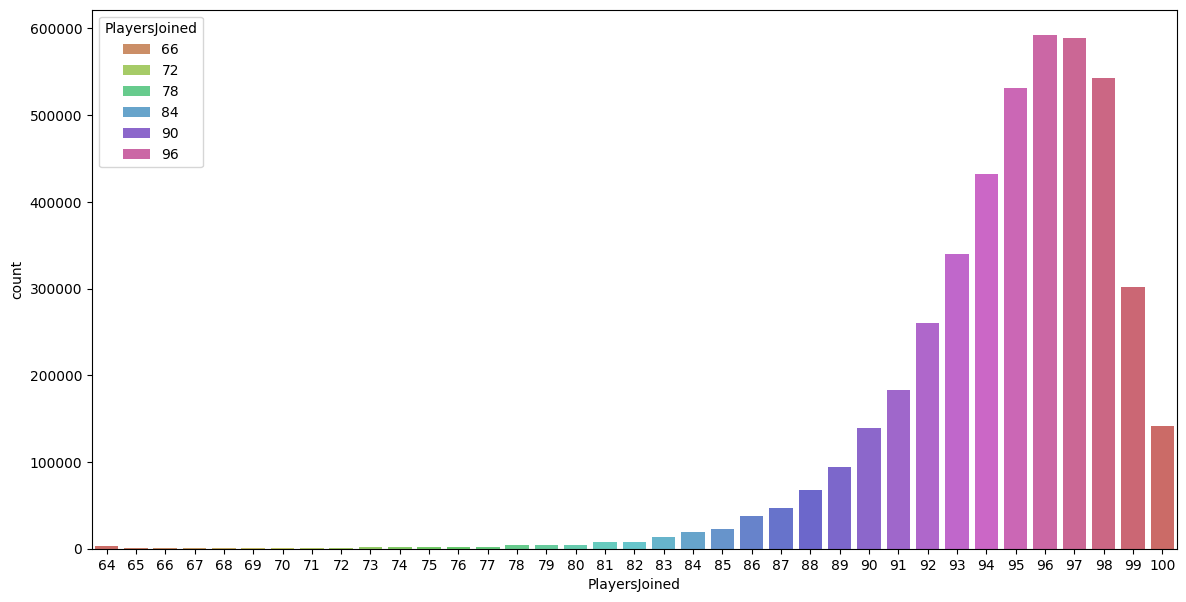

In [72]:
figure = plt.figure(figsize=(14,7))
sns.countplot(x = 'PlayersJoined', data = file1[file1['PlayersJoined'] >= 64], hue = 'PlayersJoined', palette='hls')
plt.show()

In [73]:
numeric_cols = file1.select_dtypes(include=['number']).columns

In [74]:
len(numeric_cols)

26

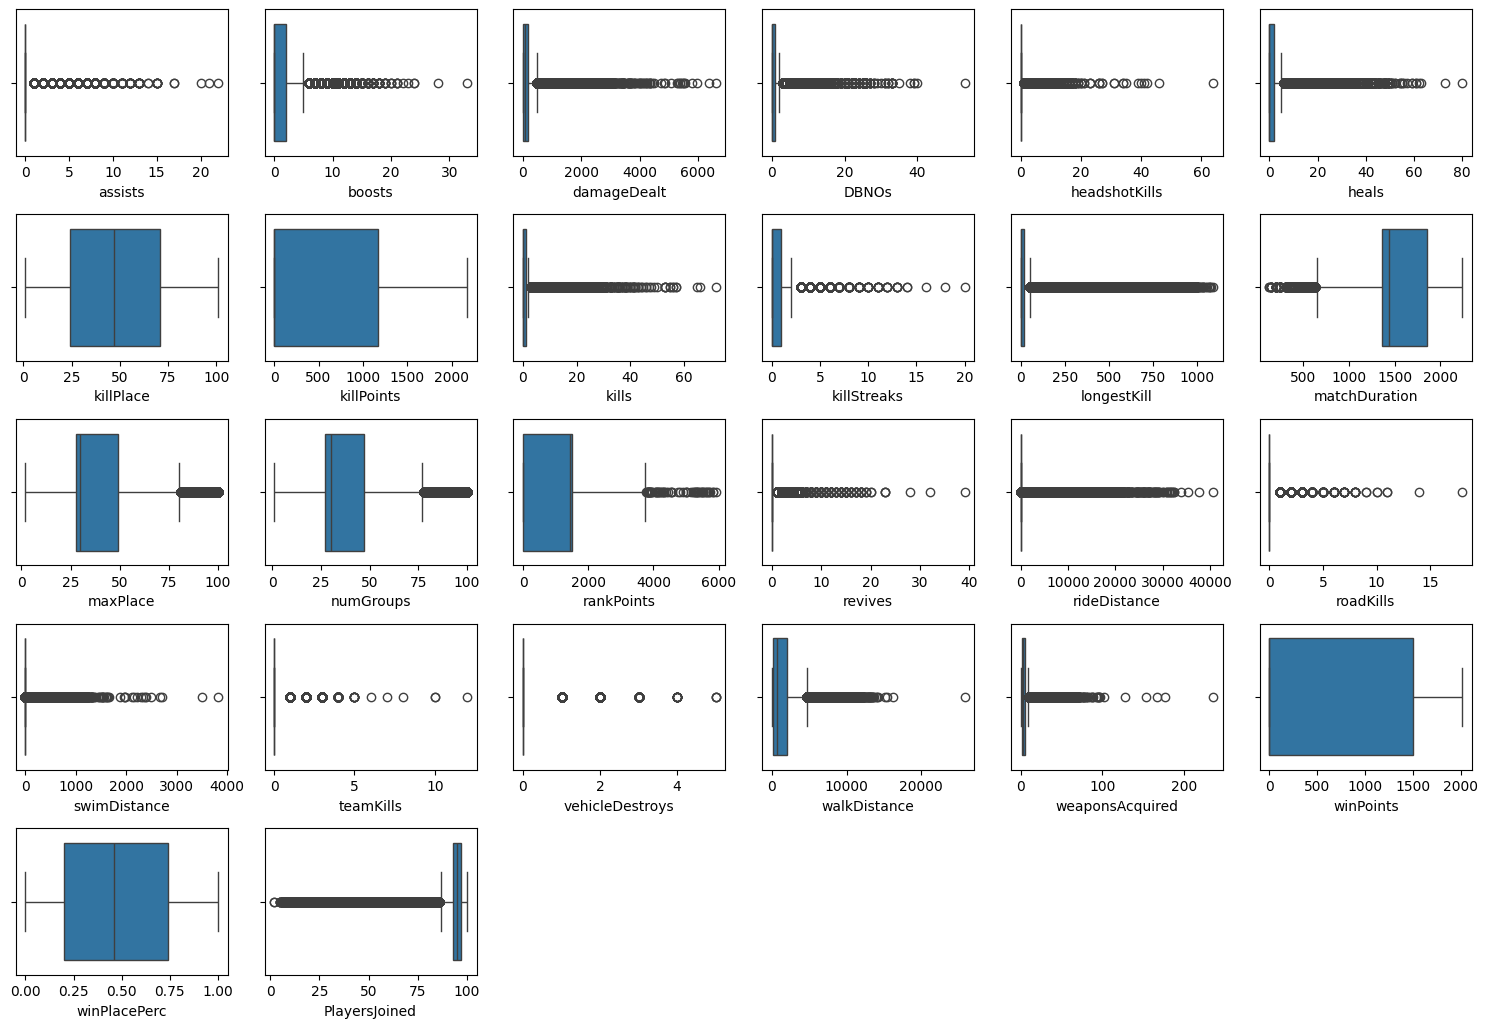

In [75]:
plt.figure(figsize = (15, 12))

for i, j in enumerate(numeric_cols):
    ax = plt.subplot(6, 6, i+1)
    sns.boxplot(x = j, data = file1)
plt.tight_layout()
plt.show()

### Data Analysis

#### Kills Without Moving

In [83]:
file1['totalDistance'] = file1 ['rideDistance'] + file1['swimDistance'] + file1['walkDistance']

In [100]:
file1['mod'] = (file1['totalDistance'] == 0) & (file1['kills'] > 0)

In [102]:
file1

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,PlayersJoined,totalDistance,mod
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000000,0,0,0,60,...,0.000,0,0,244.800003,1,1466,0.4444,96,244.800003,False
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470001,0,0,0,57,...,11.040,0,0,1434.000000,5,0,0.6400,91,1445.044556,False
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000000,0,0,0,47,...,0.000,0,0,161.800003,2,0,0.7755,98,161.800003,False
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900002,0,0,0,75,...,0.000,0,0,202.699997,3,0,0.1667,91,202.699997,False
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000000,0,0,0,45,...,0.000,0,0,49.750000,2,0,0.1875,97,49.750000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.000000,0,0,0,74,...,0.000,0,0,1019.000000,3,1507,0.1786,94,2311.000000,False
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.150002,0,0,0,69,...,0.000,0,0,81.699997,6,0,0.2935,93,81.699997,False
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.060001,0,0,0,66,...,2.184,0,0,788.700012,4,0,0.4815,98,790.884033,False
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.399994,1,1,2,11,...,0.000,0,0,2748.000000,8,0,0.8000,94,2748.000000,False


In [103]:
file1[file1['mod'] == True]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,PlayersJoined,totalDistance,mod
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.000000,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.600006,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.000000,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.800003,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.000000,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440232,1f3a6d69d22c7e,60b2849191c539,ff9cd80c0d8fb7,0,0,4.316000,0,0,0,61,...,0.0,0,0,0.0,7,1500,0.8889,75,0.0,True
4440898,a089cb33a75968,eda174acfb503b,4c6b1a0e4cb346,0,0,90.830002,0,0,4,42,...,0.0,0,0,0.0,8,0,0.0000,49,0.0,True
4440927,0634c650048997,5ccccee03a7f17,fc0bbecba8db99,2,2,909.099976,7,2,16,26,...,0.0,0,0,0.0,7,1500,0.6000,47,0.0,True
4441511,f5d385cadfab7e,a068f79011113c,fc0bbecba8db99,6,2,696.400024,9,2,0,18,...,0.0,1,0,0.0,16,1500,0.9000,47,0.0,True


In [104]:
indexes = file1[file1['mod'] == True].index

file1.drop(index=indexes, inplace = True)

In [109]:
file1[file1['roadKills'] >= 10]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,PlayersJoined,totalDistance,mod
2733926,c3e444f7d1289f,489dd6d1f2b3bb,4797482205aaa4,0,0,1246.000000,0,0,0,1,...,5.297,0,0,1277.000000,0,1371,0.4286,92,1282.302002,False
2767999,34193085975338,bd7d50fa305700,a22354d036b3d6,0,0,1102.000000,0,0,0,1,...,0.000,0,0,816.599976,5,1533,0.4713,88,4934.600098,False
2890740,a3438934e3e535,1081c315a80d14,fe744430ac0070,0,8,2074.000000,0,1,11,1,...,0.000,0,0,3150.000000,4,1568,1.0000,38,5876.000000,False
3524413,9d9d044f81de72,8be97e1ba792e3,859e2c2db5b125,0,3,1866.000000,0,5,7,1,...,0.000,0,0,1041.000000,10,1606,0.9398,84,7853.000000,False
3954337,4228347e428b79,77ea5e30cffe9a,7c9ba5f5267e54,0,0,1000.000000,0,0,0,2,...,0.000,0,0,86.480003,0,1398,0.2174,93,664.079956,False
4194275,ef242233f0c1f1,52d3feee3ff6d6,c35eb4e9d58f7c,1,1,685.400024,3,0,2,1,...,0.000,0,0,737.000000,1,0,1.0000,88,4488.000000,False


In [110]:
indexes = file1[file1['roadKills'] >= 10].index

file1.drop(index=indexes, inplace = True)

In [111]:
file1

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,PlayersJoined,totalDistance,mod
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000000,0,0,0,60,...,0.000,0,0,244.800003,1,1466,0.4444,96,244.800003,False
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470001,0,0,0,57,...,11.040,0,0,1434.000000,5,0,0.6400,91,1445.044556,False
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000000,0,0,0,47,...,0.000,0,0,161.800003,2,0,0.7755,98,161.800003,False
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900002,0,0,0,75,...,0.000,0,0,202.699997,3,0,0.1667,91,202.699997,False
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000000,0,0,0,45,...,0.000,0,0,49.750000,2,0,0.1875,97,49.750000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.000000,0,0,0,74,...,0.000,0,0,1019.000000,3,1507,0.1786,94,2311.000000,False
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.150002,0,0,0,69,...,0.000,0,0,81.699997,6,0,0.2935,93,81.699997,False
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.060001,0,0,0,66,...,2.184,0,0,788.700012,4,0,0.4815,98,790.884033,False
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.399994,1,1,2,11,...,0.000,0,0,2748.000000,8,0,0.8000,94,2748.000000,False
